# This notebook contains:
* Investigation of 850hPa and 500hPa BARRA2 winds

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import sys
import metpy
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
import pandas as pd
from netCDF4 import Dataset
import os
import glob
from datetime import datetime
import seaborn as sns
import netCDF4
from netCDF4 import Dataset
from metpy.units import units
import dask
import xarray as xr
from shapely import Polygon
import regionmask
import geopandas as gpd
import dask
from scipy.stats import circmean

In [2]:
# mean over radar domain
barra_towns = xr.open_dataset("/home/563/ac9768/barra-2/barra-2_850hPa_winds_townsville.nc", engine="h5netcdf",chunks="auto")
barra_cairns = xr.open_dataset("/home/563/ac9768/barra-2/barra-2_850hPa_winds_cairns.nc", engine="h5netcdf",chunks="auto")
barra_willis = xr.open_dataset("/home/563/ac9768/barra-2/barra-2_850hPa_winds_willis_island.nc", engine="h5netcdf",chunks="auto")
barra_towns_500 = xr.open_dataset("/home/563/ac9768/barra-2/barra-2_500hPa_winds_townsville.nc", engine="h5netcdf",chunks="auto")
barra_cairns_500 = xr.open_dataset("/home/563/ac9768/barra-2/barra-2_500hPa_winds_cairns.nc", engine="h5netcdf",chunks="auto")
barra_willis_500 = xr.open_dataset("/home/563/ac9768/barra-2/barra-2_500hPa_winds_willis.nc", engine="h5netcdf",chunks="auto")

In [116]:
winds850 = barra_towns.wind_dir.compute()
winds500 = barra_towns_500.wind_dir.compute()
winds_dir_850 = winds850[(winds850>=0)&(winds850<=180)]
winds_dir_500 = winds500[(winds500>180)&(winds500<=360)]

In [117]:
# merge indexes for each dataarray, join=inner chooses indexes which match ignoring those that don't
merged_500 = xr.merge([winds_dir_500, winds_dir_850], join='inner',compat="override") # “override”: skip comparing and pick variable from first dataset
merged_850 = xr.merge([winds_dir_850, winds_dir_500], join='inner',compat="override")

In [118]:
# merged_500.time.plot.scatter()
# merged_850.time.plot.scatter()

In [119]:
len(merged_850.time)

15757

In [120]:
merged_850.groupby(merged_850.time.dt.hour)
hours=[]
for hour in np.arange(0,24,1):
    print(len(merged_850.time.groupby(merged_850.time.dt.hour)[hour]))
    hours.append(len(merged_850.time.groupby(merged_850.time.dt.hour)[hour]))

646
649
649
639
657
669
662
658
659
672
664
662
653
650
645
660
660
675
674
658
647
652
646
651


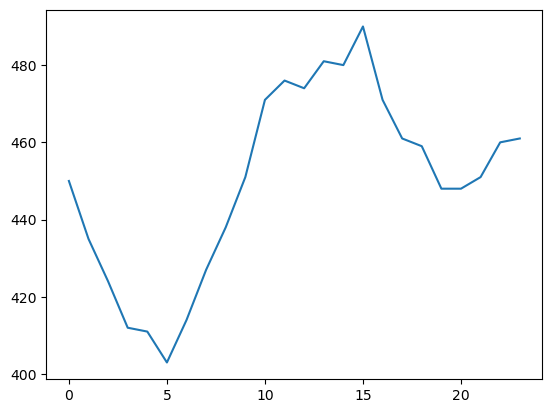

In [110]:
plt.plot(np.arange(0,24,1),hours)